# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

# Euclidean Distance

In [2]:
def eucDistance(variable1, variable2):
    distance = 0
    for i in range(len(variable2)):
        distance += (variable1[i] - variable2[i])**2
    return np.sqrt(distance)

# KNN

In [3]:
def kNN(train, testRow, yTrain, num):
    distance = list() #Stores distance of each point
    for i in range(len(train)): 
        dist = eucDistance(train[i], testRow) # Work out distance to point
        distance.append((train[i], dist, yTrain.iloc[i])) 
    distance = sort(distance) 

    kNeighbours = list() # list to store K amount of neighbour results
    for i in range(num):
        kNeighbours.append((testRow, distance[i][1], distance[i][2]))
    return kNeighbours 

# Sort Method

In [4]:
# Sorts the distance list in ascending order
def sort(dist):
    for i in range(0, len(dist)):
        for j in range(0, len(dist) - i - 1):
            if (dist[j][1] > dist[j + 1][1]):
                temp = dist[j]
                dist[j] = dist[j + 1]
                dist[j + 1] = temp
    return dist

# Predict Method

In [5]:
from statistics import mean 

# Predicts the value of the test variable
def predict(train, test, yTrain, num_neighbors):
    predictions = list()
    for i in range(len(test)):
        neighbour = kNN(train, test[i], yTrain, num_neighbors)
        labels = [] # Stores yTrain for each test variable
        for i in range (len(neighbour)):
            t = labels.append(neighbour[i][2]) # Appends yTrain
        predictions.append(mean(labels))
    return predictions

# RMSE

In [6]:
# Calculates the root mean squared error
def rmse(test, pred):
    MSE = np.square(np.subtract(test, pred)).mean()
    return sqrt(MSE)

# Cleaning and Splitting Dataset

In [7]:
modelEncoder = LabelEncoder()
transmissionEncoder = LabelEncoder()
fuelTypeEncoder = LabelEncoder()
scaler = MinMaxScaler() # Scaler for normalizing the data

def dataset(brand): 
    file = pd.read_csv(brand, quotechar='"', skipinitialspace=True) # Reads the dataset

    # Removes all outliers from the 'year' column
    for i in ['year']:
        q75,q25 = np.percentile(file.loc[:,i],[75,25])
        IQR = q75-q25 # Interquartile range
    
        max = q75+(1.5*IQR)
        min = q25-(1.5*IQR)
    
        file.loc[file[i] < min, i] = np.nan # Replaces outliers smaller than min with NaN
        file.loc[file[i] > max, i] = np.nan # Replaces outliers larger than max with NaN

    file = file.dropna(axis = 0) # Removes rows with NaN values

    # Turns string values into numerical values using LabelEncoder
    modelEncoder.fit(file["model"])
    file["model"] = modelEncoder.transform(file["model"])
    
    transmissionEncoder.fit(file["transmission"])
    file["transmission"] = transmissionEncoder.transform(file["transmission"])
    
    fuelTypeEncoder.fit(file["fuelType"])
    file["fuelType"] = fuelTypeEncoder.transform(file["fuelType"])

    file = file.head(1000) # Limits dataset size to 10,000

    X = file.drop(columns = ['price'])
    Y = file.price
    
    # Splits data into 75% training and 25% testing data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)
    
    # Normalises data using MinMaxScaler
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return  X_train, X_test, Y_train, Y_test, file, X, Y

X_train, X_test, Y_train, Y_test, file, X, Y = dataset("../UKUsedCarDataSet/vauxhall.csv") # Change file name to change dataset here

# Evaluation Method

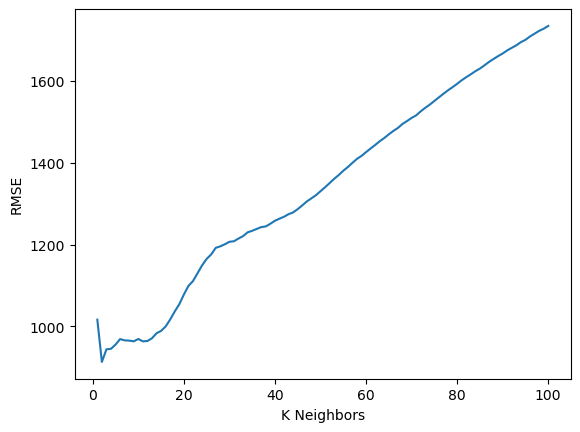

In [8]:
# Plots the RMSE values for each K value
def eva(train, test, yTrain, yTest):
    rmseValues = []
    predictions = []
    for k in range(1, 101): # Testing up to 100 neearest neighbours
        y_pred = predict(train, test, yTrain, k)
        error = rmse(yTest, y_pred) 
        rmseValues.append(error)
        # print('RMSE value for k =' , k , 'is:', error)

    plt.plot(np.arange(100) + 1, rmseValues)
    plt.xlabel('K Neighbors')
    plt.ylabel('RMSE')
    
    return

eva(X_train, X_test, Y_train, Y_test)

# Cross Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=601)

RMSEScores = []

# Iterate over the KFold splits
for n, m in kf.split(X):
    X_train, X_test = X.iloc[n], X.iloc[m]
    Y_train, Y_test = Y.iloc[n], Y.iloc[m]
    
    # Predict on the test data
    Y_pred = predict(X_train, X_test, Y_train, 4)
    
    # Compute the RMSE score for this fold
    RMSEValue = rmse(Y_test, Y_pred)
    RMSEScores.append(RMSEValue)

# Compute the average RMSE score across all folds
print("Average RMSE score:", np.mean(RMSEScores))


# Hold-out Validation

In [9]:
# Calculates the RMSE value for a 4 nearest neighbour model
def NN(train, test, yTrain, yTest):    
    y_pred = predict(train, test, yTrain, 4)
    error = rmse(yTest, y_pred) 
    print('RMSE value for k =' , 4 , 'is:', round(error, 2))
    return 

NN(X_train, X_test, Y_train, Y_test)

RMSE value for k = 4 is: 945.22


# User Input Predictions

In [10]:
inputPred = []
entries = []

def userInput():
    chooseBrand = input("Choose your car brand: Audi, BMW, Ford, Hyundai, Mercedes, Skoda, Toyota, Vauxhall or Volkswagen \n")
    
    if chooseBrand == "Audi":
        return "../UKUsedCarDataSet/audi.csv"
    elif chooseBrand == "BMW":
        return "../UKUsedCarDataSet/bmw.csv"
    elif chooseBrand == "Ford":
        return "../UKUsedCarDataSet/ford.csv"
    elif chooseBrand == "Hyundai":
        return "../UKUsedCarDataSet/hyundi.csv"
    elif chooseBrand == "Mercedes":
        return "../UKUsedCarDataSet/merc.csv"
    elif chooseBrand == "Skoda":
        return "../UKUsedCarDataSet/skoda.csv"
    elif chooseBrand == "Toyota":
        return "../UKUsedCarDataSet/toyota.csv"
    elif chooseBrand == "Vauxhall":
        return "../UKUsedCarDataSet/vauxhall.csv"
    elif chooseBrand == "Volkswagen":
        return "../UKUsedCarDataSet/vw.csv"
    else:
        print("Invalid Car Brand")
        userInput()
    return 
  
X_train, X_test, Y_train, Y_test, file, X, Y = dataset(userInput())

print("\n List of models:")
print(list(modelEncoder.classes_))

inputPred.append((modelEncoder.transform([input("\nWhat Model is your car? ")]))[0])
inputPred.append(int(input("What year is your car? ")))
inputPred.append((transmissionEncoder.transform([input("What transmission is your car? ")]))[0])
inputPred.append(int(input("How much mileage does your car have? ")))
inputPred.append((fuelTypeEncoder.transform([input("What's your car fuel type? ")]))[0])
inputPred.append(int(input("How much is your cars tax? ")))
inputPred.append(float(input("What's MPG of your car? ")))
inputPred.append(float(input("What the engine size of your car? ")))
entries.append(inputPred)
inputPred = scaler.transform([inputPred])

import time
print("\n ***Predicting***")
start = time.time()
y_pred = predict(X_train, inputPred, Y_train, 4)
# {0:.2f}'.format()
print("\n Predicted price for your car is: £", round(y_pred[0], 2))

print("\n ***Predicted in", time.time() - start,"seconds***")


 List of models:
['A1', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'R8', 'RS3', 'RS4', 'RS5', 'RS6', 'RS7', 'S3', 'S4', 'S5', 'S8', 'SQ5', 'SQ7', 'TT']

 ***Predicting***

 Predicted price for your car is: £ 44717

 ***Predicted in 0.08976149559020996 seconds***


c:\Users\rb22\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
